# Prepping Up

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook 
import seaborn as sns
import imageio
import time
from IPython.display import HTML


from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [2]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

In [3]:
np.random.seed(0)

# Testing Vectorization

In [4]:
N = 100
M = 200
a = np.random.rand(N, M)
b = np.random.rand(N, M)
c = np.zeros((N, M))

%%time is used to print the execution time of the cell.

In [5]:
%%time
for i in range(N):
    for j in range(M):
        c[i,j] = a[i,j] + b[i,j]

CPU times: user 21.3 ms, sys: 0 ns, total: 21.3 ms
Wall time: 23.6 ms


In [6]:
%%time 
c = a + b

CPU times: user 131 µs, sys: 25 µs, total: 156 µs
Wall time: 165 µs


In [7]:
%%time
for i in range(N):
    for j in range(M):
        c[i,j] = np.sin(a[i, j] + 1)

CPU times: user 41.5 ms, sys: 0 ns, total: 41.5 ms
Wall time: 44.2 ms


In [8]:
%%time
c = np.sin(a + 1)

CPU times: user 1.42 ms, sys: 0 ns, total: 1.42 ms
Wall time: 927 µs


# Generate Data

In [9]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


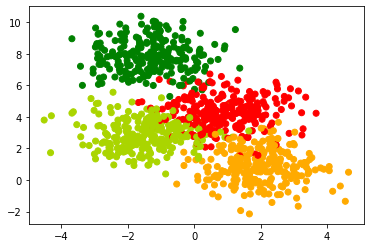

In [10]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [11]:
labels_orig = labels
labels = np.mod(labels_orig, 2)

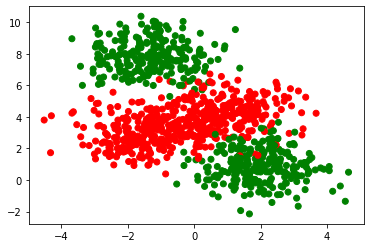

In [12]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

# MultiClass Classification

Splitting into Train and Test data.

In [13]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels_orig, stratify=labels_orig, random_state=0)
print(X_train.shape, X_val.shape, labels_orig.shape)

(750, 2) (250, 2) (1000,)


One Hot encoding of the output (Y).

In [14]:
enc = OneHotEncoder()
# 0 -> (1, 0, 0, 0), 1 -> (0, 1, 0, 0), 2 -> (0, 0, 1, 0), 3 -> (0, 0, 0, 1)
y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
y_OH_val = enc.fit_transform(np.expand_dims(Y_val,1)).toarray()
print(y_OH_train.shape, y_OH_val.shape)

(750, 4) (250, 4)


In [15]:
# Refer Backpropogating Scalar Class
W1 = np.random.randn(2,2) # 2 inputs and 2 outputs in NN
W2 = np.random.randn(2,4) # 2 inputs and 4 outputs in NN
print(W1)
print(W2)

[[-1.23027959 -0.55720736]
 [-0.84289712 -0.04659767]]
[[-0.21169758 -0.13334113 -1.32104407 -0.60069799]
 [-0.41261793  0.07544432  0.70986493 -0.7600352 ]]


# Scalar Version

In [16]:
class multi_scalar:
  
    def __init__(self, W1, W2):
        self.w1 = W1[0][0].copy()
        self.w2 = W1[1][0].copy()
        self.w3 = W1[0][1].copy()
        self.w4 = W1[1][1].copy()

        self.w5 = W2[0][0].copy()
        self.w6 = W2[1][0].copy()
        self.w7 = W2[0][1].copy()
        self.w8 = W2[1][1].copy()
        self.w9 = W2[0][2].copy()
        self.w10 = W2[1][2].copy()
        self.w11 = W2[0][3].copy()
        self.w12 = W2[1][3].copy()
        self.b1 = 0
        self.b2 = 0
        self.b3 = 0
        self.b4 = 0
        self.b5 = 0
        self.b6 = 0
    
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def forward_pass(self, x):
        # input layer
        self.x1, self.x2 = x
        
        # hidden layer
        self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
        self.h1 = self.sigmoid(self.a1)
        self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
        self.h2 = self.sigmoid(self.a2)
        
        # output layer
        self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
        self.a4 = self.w7*self.h1 + self.w8*self.h2 + self.b4
        self.a5 = self.w9*self.h1 + self.w10*self.h2 + self.b5
        self.a6 = self.w11*self.h1 + self.w12*self.h2 + self.b5
        sum_exps = np.sum([np.exp(self.a3), np.exp(self.a4), np.exp(self.a5), np.exp(self.a6)])
        self.h3 = np.exp(self.a3)/sum_exps
        self.h4 = np.exp(self.a4)/sum_exps
        self.h5 = np.exp(self.a5)/sum_exps
        self.h6 = np.exp(self.a6)/sum_exps
        
        return np.array([self.h3, self.h4, self.h5, self.h6])
    
    def grad(self, x, y):
        self.forward_pass(x)
        self.y1, self.y2, self.y3, self.y4 = y
        
        self.da3 = (self.h3-self.y1)
        self.da4 = (self.h4-self.y2)
        self.da5 = (self.h5-self.y3)
        self.da6 = (self.h6-self.y4)
        
        self.dw5 = self.da3*self.h1
        self.dw6 = self.da3*self.h2
        self.db3 = self.da3
        
        self.dw7 = self.da4*self.h1
        self.dw8 = self.da4*self.h2
        self.db4 = self.da4
        
        self.dw9 = self.da5*self.h1
        self.dw10 = self.da5*self.h2
        self.db5 = self.da5
        
        self.dw11 = self.da6*self.h1
        self.dw12 = self.da6*self.h2
        self.db6 = self.da6
        
        self.dh1 = self.da3*self.w5 + self.da4*self.w7 + self.da5*self.w9 + self.da6*self.w11
        self.dh2 = self.da3*self.w6 + self.da4*self.w8 + self.da5*self.w10 + self.da6*self.w12
        
        self.da1 = self.dh1 * self.h1*(1-self.h1)
        self.da2 = self.dh2 * self.h2*(1-self.h2)
        
        self.dw1 = self.da1*self.x1
        self.dw2 = self.da1*self.x2
        self.db1 = self.da1
        
        self.dw3 = self.da2*self.x1
        self.dw4 = self.da2*self.x2
        self.db2 = self.da2
        
    
    def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False, display_weight=False):
        if display_loss:
            loss = {}
        
        for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
            dw1, dw2, dw3, dw4, dw5, dw6, dw7, dw8, dw9, dw10, dw11, dw12, db1, db2, db3, db4, db5, db6  = [0]*18
            for x, y in zip(X, Y):
                self.grad(x, y)
                dw1 += self.dw1
                dw2 += self.dw2
                dw3 += self.dw3
                dw4 += self.dw4
                dw5 += self.dw5
                dw6 += self.dw6
                dw7 += self.dw7
                dw8 += self.dw8
                dw9 += self.dw9
                dw10 += self.dw10
                dw11 += self.dw11
                dw12 += self.dw12
                db1 += self.db1
                db2 += self.db2
                db3 += self.db3
                db4 += self.db4
                db2 += self.db5
                db3 += self.db6
                
            m = X.shape[0]
            self.w1 -= (learning_rate * (dw1 / m))
            self.w2 -= (learning_rate * (dw2 / m))
            self.w3 -= (learning_rate * (dw3 / m))
            self.w4 -= (learning_rate * (dw4 / m))
            self.w5 -= (learning_rate * (dw5 / m))
            self.w6 -= (learning_rate * (dw6 / m))
            self.w7 -= (learning_rate * (dw7 / m))
            self.w8 -= (learning_rate * (dw8 / m))
            self.w9 -= (learning_rate * (dw9 / m))
            self.w10 -= (learning_rate * (dw10 / m))
            self.w11 -= (learning_rate * (dw11 / m))
            self.w12 -= (learning_rate * (dw12 / m))
            self.b1 -= (learning_rate * (db1 / m))
            self.b2 -= (learning_rate * (db2 / m))
            self.b3 -= (learning_rate * (db3 / m))
            self.b4 -= (learning_rate * (db4 / m))
            self.b5 -= (learning_rate * (db5 / m))
            self.b6 -= (learning_rate * (db6 / m))
            
            if display_loss:
                Y_pred = self.predict(X)
                loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)
        
        if display_loss:
            Wt1 = [[self.w1, self.w3], [self.w2, self.w4]]
            Wt2 = [[self.w5, self.w6, self.w7, self.w8], [self.w9, self.w10, self.w11, self.w12]]
            plt.plot(list(loss.values()))
            plt.xlabel('Epochs')
            plt.ylabel('Log Loss')
            plt.show()
        
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred)

# Weight Vectorization

In [17]:
class multi_weight_vector:

    def __init__(self, W1, W2):
        self.W1 = W1.copy()
        self.W2 = W2.copy()
        self.B1 = np.zeros((1,2))
        self.B2 = np.zeros((1,4))

    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    def softmax(self, x):
        exps = np.exp(x)
        return exps/np.sum(exps)
    
    def forward_pass(self, x):
        x = x.reshape(1,-1) # X now becomes 1 row and all columns(2 columns).
        self.A1 = np.matmul(x,self.W1) + self.B1  # Dim = (1,2) * (2,2) -> (1,2)
        self.H1 = self.sigmoid(self.A1) # DIM = (1,2)
        self.A2 = np.matmul(self.H1,self.W2) + self.B2 # Dim =(1,2) * (2,4) -> (1,4)
        self.H2 = self.softmax(self.A2) # DIM = (1,4)
        return self.H2
    
    def grad_sigmoid(self, x):
        return x*(1-x)
    
    def grad(self, x, y):
        self.forward_pass(x)
        x = x.reshape(1, -1) # (1, 2)
        y = y.reshape(1, -1) # (1, 4)
        
        self.dA2 = self.H2 - y # (1, 4) 
        
        self.dW2 = np.matmul(self.H1.T, self.dA2) # (2, 1) * (1, 4) -> (2, 4)
        self.dB2 = self.dA2 # (1, 4)
        self.dH1 = np.matmul(self.dA2, self.W2.T) # (1, 4) * (4, 2) -> (1, 2)
        self.dA1 = np.multiply(self.dH1, self.grad_sigmoid(self.H1)) # -> (1, 2)
        
        self.dW1 = np.matmul(x.T, self.dA1) # (2, 1) * (1, 2) -> (2, 2)
        self.dB1 = self.dA1 # (1, 2)

    def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False):
      
        if display_loss:
            loss = {}
        
        for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
            dW1 = np.zeros((2,2))
            dW2 = np.zeros((2,4))
            dB1 = np.zeros((1,2))
            dB2 = np.zeros((1,4))
            for x, y in zip(X, Y):
                self.grad(x, y)
                dW1 += self.dW1
                dW2 += self.dW2
                dB1 += self.dB1
                dB2 += self.dB2  
            
            m = X.shape[0]
            self.W2 -= learning_rate * (dW2/m)
            self.B2 -= learning_rate * (dB2/m)
            self.W1 -= learning_rate * (dW1/m)
            self.B1 -= learning_rate * (dB1/m)

            if display_loss:
                Y_pred = self.predict(X)
                loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)
            
        
        if display_loss:
            plt.plot(list(loss.values()))
            plt.xlabel('Epochs')
            plt.ylabel('Log Loss')
            plt.show()
  
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred).squeeze()   

# Input + Weight Vectorization

In [18]:
class multi_inputweight_vector:

    def __init__(self, W1, W2):
        self.W1 = W1.copy()
        self.W2 = W2.copy()
        self.B1 = np.zeros((1,2))
        self.B2 = np.zeros((1,4))

    def sigmoid(self, X):
        return 1/(1 + np.exp(-X))
    
    def softmax(self, X):
        exps = np.exp(X)
        return exps / np.sum(exps, axis=1).reshape(-1,1)
    
    def forward_pass(self, X):
        self.A1 = np.matmul(X,self.W1) + self.B1  # (N,2) * (2,2) -> (N,2)
        self.H1 = self.sigmoid(self.A1) # (N,2)
        self.A2 = np.matmul(self.H1,self.W2) + self.B2 # (N,2) * (2,4) -> (N,4)
        self.H2 = self.softmax(self.A2) # (N,4)
        return self.H2
    
    def grad_sigmoid(self, X):
        return X*(1-X)
    
    def grad(self, X, Y):
        self.forward_pass(X)
        m = X.shape[0]

        # Note that dW1,dW2 remains of size W1 and W2 itself, it does not depend on the input.
        # Also dB1,dB2 remains of size B1 and B2 itself, it does not depend on the input.
        
        self.dA2 = self.H2 - Y # (N, 4) - (N, 4) -> (N, 4)
        
        self.dW2 = np.matmul(self.H1.T, self.dA2) # (2, N) * (N, 4) -> (2, 4)
        self.dB2 = np.sum(self.dA2, axis=0).reshape(1, -1) # (N, 4) -> (1, 4) Summing along axis  0 to add N's and then reshaping.
        self.dH1 = np.matmul(self.dA2, self.W2.T) # (N, 4) * (4, 2) -> (N, 2)
        self.dA1 = np.multiply(self.dH1, self.grad_sigmoid(self.H1)) # (N, 2) .* (N, 2) -> (N, 2)
        
        self.dW1 = np.matmul(X.T, self.dA1) # (2, N) * (N, 2) -> (2, 2)
        self.dB1 = np.sum(self.dA1, axis=0).reshape(1, -1) # (N, 2) -> (1, 2) Summing along axis  0 to add N's and then reshaping.

    def fit(self, X, Y, epochs=100, learning_rate=1, display_loss=False):
      
        if display_loss:
            loss = {}
        
        for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
            self.grad(X, Y)  
            
            m = X.shape[0]
            self.W2 -= learning_rate * (self.dW2/m)
            self.B2 -= learning_rate * (self.dB2/m)
            self.W1 -= learning_rate * (self.dW1/m)
            self.B1 -= learning_rate * (self.dB1/m)

            if display_loss:
                Y_pred = self.predict(X)
                loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)
            
        
        if display_loss:
            plt.plot(list(loss.values()))
            plt.xlabel('Epochs')
            plt.ylabel('Log Loss')
            plt.show()
  
    def predict(self, X):
        Y_pred = self.forward_pass(X)
        return np.array(Y_pred).squeeze() 

# Model Running and Comparison

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


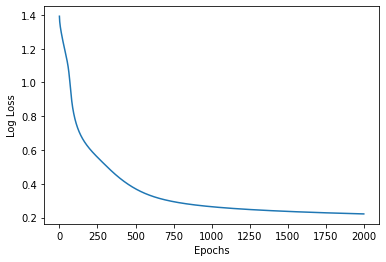

Time taken by model 1: 3.095268964767456


In [19]:
models_init = [multi_inputweight_vector(W1,W2) ]
models = []

for index, model in enumerate(models_init, start = 1):
    tic = time.time()
    ffn_multi_model = model
    ffn_multi_model.fit(X_train, y_OH_train, epochs = 2000, learning_rate = 0.5, display_loss=True)
    models.append(ffn_multi_model)
    toc = time.time()
    print("Time taken by model {}: {}".format(index, toc-tic))

In [20]:
for index, model in enumerate(models_init, start = 1):
    Y_pred_train = model.predict(X_train)
    Y_pred_train = np.argmax(Y_pred_train, 1)

    Y_pred_val = model.predict(X_val)
    Y_pred_val = np.argmax(Y_pred_val, 1)

    accuracy_train = accuracy_score(Y_pred_train, Y_train)
    accuracy_val = accuracy_score(Y_pred_val, Y_val)

    print("Model No = ", index)
    print("Training Accuracy = ", round(accuracy_train, 2))
    print("Training Accuracy = ", round(accuracy_val, 2))
    print("")

Model No =  1
Training Accuracy =  0.92
Training Accuracy =  0.94



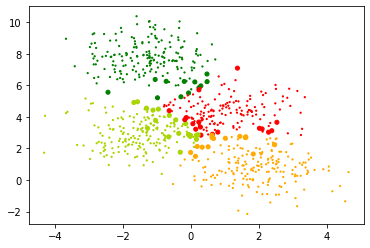

In [21]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_train, cmap = my_cmap, s=15*(np.abs(np.sign(Y_pred_train-Y_train))+.1))

# Exercises

1. Replicate this vectorisation for the simple first network we saw earlier (Binary Classification Network)

2. Extend this vectorisation for the generic feed forward class that we wrote with number of hidden layers and neurons per hidden layer as inputs

3. Understand how the speedup changes as you increase the hidden layers - Keep the number of neurons per layer constant and increase the layers to see how the speed up changes

In [22]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


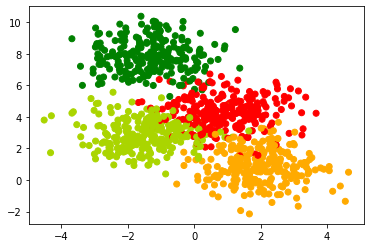

In [23]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [24]:
labels_orig = labels

In [25]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels_orig, stratify=labels_orig, random_state=0)
print(X_train.shape, X_val.shape, labels_orig.shape)

(750, 2) (250, 2) (1000,)


In [26]:
print(Y_train.shape, Y_val.shape)

(750,) (250,)


In [27]:
enc = OneHotEncoder()
# 0 -> (1, 0, 0, 0), 1 -> (0, 1, 0, 0), 2 -> (0, 0, 1, 0), 3 -> (0, 0, 0, 1)
y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
y_OH_val = enc.fit_transform(np.expand_dims(Y_val,1)).toarray()
print(y_OH_train.shape, y_OH_val.shape)

(750, 4) (250, 4)


In [28]:
class multi_inputweight_vector:

    def __init__(self, W1, W2):
        self.W1 = W1.copy()
        self.W2 = W2.copy()
        self.B1 = np.zeros((1,2))
        self.B2 = np.zeros((1,4))

    def sigmoid(self, X):
        return 1/(1 + np.exp(-X))
    
    def softmax(self, X):
        exps = np.exp(X)
        return exps / np.sum(exps, axis=1).reshape(-1,1)
    
    def forward_pass(self, X):
        self.A1 = np.matmul(X,self.W1) + self.B1  # (N,2) * (2,2) -> (N,2)
        self.H1 = self.sigmoid(self.A1) # (N,2)
        self.A2 = np.matmul(self.H1,self.W2) + self.B2 # (N,2) * (2,4) -> (N,4)
        self.H2 = self.softmax(self.A2) # (N,4)
        return self.H2
    
    def grad_sigmoid(self, X):
        return X*(1-X)
    
    def grad(self, X, Y):
        self.forward_pass(X)
        m = X.shape[0]

        # Note that dW1,dW2 remains of size W1 and W2 itself, it does not depend on the input.
        # Also dB1,dB2 remains of size B1 and B2 itself, it does not depend on the input.
        
        self.dA2 = self.H2 - Y # (N, 4) - (N, 4) -> (N, 4)
        
        self.dW2 = np.matmul(self.H1.T, self.dA2) # (2, N) * (N, 4) -> (2, 4)
        self.dB2 = np.sum(self.dA2, axis=0).reshape(1, -1) # (N, 4) -> (1, 4) Summing along axis  0 to add N's and then reshaping.
        self.dH1 = np.matmul(self.dA2, self.W2.T) # (N, 4) * (4, 2) -> (N, 2)
        self.dA1 = np.multiply(self.dH1, self.grad_sigmoid(self.H1)) # (N, 2) .* (N, 2) -> (N, 2)
        
        self.dW1 = np.matmul(X.T, self.dA1) # (2, N) * (N, 2) -> (2, 2)
        self.dB1 = np.sum(self.dA1, axis=0).reshape(1, -1) # (N, 2) -> (1, 2) Summing along axis  0 to add N's and then reshaping.

    def fit(self, X, Y, epochs=100, learning_rate=1, display_loss=False):
      
        if display_loss:
            loss = {}
        
        for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
            self.grad(X, Y)  
            
            m = X.shape[0]
            self.W2 -= learning_rate * (self.dW2/m)
            self.B2 -= learning_rate * (self.dB2/m)
            self.W1 -= learning_rate * (self.dW1/m)
            self.B1 -= learning_rate * (self.dB1/m)

            if display_loss:
                Y_pred = self.predict(X)
                loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)
            
        
        if display_loss:
            plt.plot(list(loss.values()))
            plt.xlabel('Epochs')
            plt.ylabel('Log Loss')
            plt.show()
  
    def predict(self, X):
        Y_pred = self.forward_pass(X)
        return np.array(Y_pred).squeeze() 

## Generic FFN

In [29]:
class FFMulti_NNetwork:
  
    def __init__(self, n_inputs, n_outputs, hidden_sizes=[2]):
        self.nx = n_inputs
        self.ny = n_outputs
        self.nh = len(hidden_sizes)
        self.sizes = [self.nx] + hidden_sizes + [self.ny]
        
        self.W = {}
        self.B = {}

        for i in range(self.nh+1):
            self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1]) 
            self.B[i+1] = np.zeros((1, self.sizes[i+1]))
    
    def sigmoid(self, X):
        return 1.0/(1.0 + np.exp(-X))

    def softmax(self, X):
        exps = np.exp(X)
        return exps / np.sum(exps, axis = 1).reshape(-1,1)
    
    def forward_pass(self, X):
        self.A = {}
        self.H = {}
        self.H[0] = X      
        for i in range(self.nh):
            self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1] 
            self.H[i+1] = self.sigmoid(self.A[i+1])

        self.A[self.nh+1] = np.matmul(self.H[self.nh], self.W[self.nh+1]) + self.B[self.nh+1]
        self.H[self.nh+1] = self.softmax(self.A[self.nh+1])
        return self.H[self.nh+1]        
    
    def grad_sigmoid(self, X):
        return X*(1-X) 
        
    def grad(self, X, Y):
        self.forward_pass(X)
        self.dW = {}
        self.dB = {}
        self.dH = {}
        self.dA = {}
        L = self.nh + 1
        self.dA[L] = (self.H[L] - Y)
        for k in range(L, 0, -1):
            self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
            self.dB[k] = np.sum(self.dA[k], axis = 0).reshape(1,-1)
            self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
            self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))

        
    def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False):
        if display_loss:
            loss = {}
        
        for e in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
            self.grad(X, Y)
            
            m = X.shape[0]
            for i in range(self.nh+1):
                self.W[i+1] -= learning_rate * (self.dW[i+1] / m)
                self.B[i+1] -= learning_rate * (self.dB[i+1] / m)
            
            if display_loss:
                Y_pred = self.predict(X)
                loss[e] = log_loss(np.argmax(Y, axis=1), Y_pred)
        
        if display_loss:
            plt.plot(list(loss.values()))
            plt.xlabel('Epochs')
            plt.ylabel('CE')
            plt.show()
      
    def predict(self, X):
        Y_pred = self.forward_pass(X)
        return np.array(Y_pred).squeeze()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


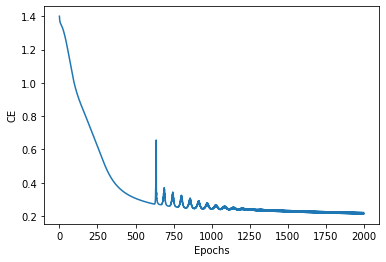

In [30]:
ffn = FFMulti_NNetwork(2,4,[2,3])
np.random.seed(0)
ffn.fit(X_train, y_OH_train, epochs = 2000, learning_rate= 0.5, display_loss= True)

In [31]:
Y_pred_train = ffn.predict(X_train)
Y_pred_train = np.argmax(Y_pred_train, 1)

Y_pred_val = ffn.predict(X_val)
Y_pred_val = np.argmax(Y_pred_val, 1)

accuracy_train = accuracy_score(Y_pred_train, Y_train)
accuracy_val = accuracy_score(Y_pred_val, Y_val)

print("Training accuracy = ", round(accuracy_train, 2))
print("Validation accuracy = ", round(accuracy_val, 2))

Training accuracy =  0.92
Validation accuracy =  0.91
